## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading input file

In [2]:
covid = pd.read_csv("COVID-19 Cases.csv")

C:\Users\samip\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Analysis of existing data

In [3]:
print(covid.head(5),'\n')
print(covid.shape)
#(x,y)   x - lines    y - columns

   Case_Type  People_Total_Tested_Count  Cases  Difference       Date  \
0  Confirmed                        NaN      6           0  5/22/2020   
1  Confirmed                        NaN      0           0   2/3/2020   
2     Deaths                        NaN      0           0   3/1/2020   
3  Confirmed                        NaN     23           0  4/21/2020   
4     Deaths                        NaN     56           0  5/11/2020   

          Combined_Key       Country_Region Province_State Admin2 iso2 iso3  \
0       Western Sahara       Western Sahara            NaN    NaN   EH  ESH   
1          Switzerland          Switzerland            NaN    NaN   CH  CHE   
2               Cyprus               Cyprus            NaN    NaN   CY  CYP   
3  Antigua and Barbuda  Antigua and Barbuda            NaN    NaN   AG  ATG   
4             Thailand             Thailand            NaN    NaN   TH  THA   

   FIPS        Lat        Long  Population_Count  \
0   NaN  24.215500  -12.885800    

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950670 entries, 0 to 950669
Data columns (total 18 columns):
Case_Type                               950670 non-null object
People_Total_Tested_Count               6048 non-null float64
Cases                                   950670 non-null int64
Difference                              950670 non-null int64
Date                                    950670 non-null object
Combined_Key                            950670 non-null object
Country_Region                          950670 non-null object
Province_State                          901260 non-null object
Admin2                                  878580 non-null object
iso2                                    949590 non-null object
iso3                                    949860 non-null object
FIPS                                    849690 non-null float64
Lat                                     921780 non-null float64
Long                                    921780 non-null float64
Populat

In [5]:
#Dataset contains numerical and categorical columns
#Checking the number of columns for each data type

numerical_feats = covid.dtypes[covid.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
print(numerical_feats)

categorical_feats = covid.dtypes[covid.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

print(covid[numerical_feats].columns)
print("*"*100)
print(covid[categorical_feats].columns)

print(covid[numerical_feats].columns)
print("*"*100)
print(covid[categorical_feats].columns)

Number of Numerical features:  8
Index(['People_Total_Tested_Count', 'Cases', 'Difference', 'FIPS', 'Lat',
       'Long', 'Population_Count', 'People_Hospitalized_Cumulative_Count'],
      dtype='object')
Number of Categorical features:  10
Index(['People_Total_Tested_Count', 'Cases', 'Difference', 'FIPS', 'Lat',
       'Long', 'Population_Count', 'People_Hospitalized_Cumulative_Count'],
      dtype='object')
****************************************************************************************************
Index(['Case_Type', 'Date', 'Combined_Key', 'Country_Region', 'Province_State',
       'Admin2', 'iso2', 'iso3', 'Data_Source', 'Prep_Flow_Runtime'],
      dtype='object')
Index(['People_Total_Tested_Count', 'Cases', 'Difference', 'FIPS', 'Lat',
       'Long', 'Population_Count', 'People_Hospitalized_Cumulative_Count'],
      dtype='object')
****************************************************************************************************
Index(['Case_Type', 'Date', 'Combined_Key

In [6]:
#So lets try to observe the missing data in every column of the dataset.
pd.options.display.max_rows = 4000
miss_tot = covid.isnull().sum().sort_values(ascending=False)
miss_percent = (covid.isnull().sum()/len(covid)).sort_values(ascending=False)
miss_data = pd.concat([miss_tot, miss_percent ], axis=1, keys=['miss_tot', 'miss_percent'])
miss_data

miss_tot  miss_percent
People_Hospitalized_Cumulative_Count    944622      0.993638
People_Total_Tested_Count               944622      0.993638
FIPS                                    100980      0.106220
Admin2                                   72090      0.075831
Province_State                           49410      0.051974
Population_Count                         28890      0.030389
Long                                     28890      0.030389
Lat                                      28890      0.030389
iso2                                      1080      0.001136
iso3                                       810      0.000852
Date                                         0      0.000000
Cases                                        0      0.000000
Difference                                   0      0.000000
Prep_Flow_Runtime                            0      0.000000
Combined_Key                                 0      0.000000
Country_Region                               0      0.000000
Data_Source                                  0      0.000000
Case_Type                                    0      0.000000

In [7]:
a=['Case_Type']

for i in a: 
    print(f"Count values of distinct {i}")
    print(covid[i].value_counts())

Count values of distinct Case_Type
Deaths       475335
Confirmed    475335
Name: Case_Type, dtype: int64


In [8]:
#Checking mising values percentage
print(((covid.isna().sum().sum())*100)/(950670*18))

12.85808955789075


### Data imputation

In [9]:
#Imputing Population_Count column
#Filling missed Population_Count value by calculating "mean" of the colum( group by country_region)

covid['Population_Count'] = covid.groupby('Country_Region').Population_Count.transform(lambda x: x.fillna(x.mean()))
covid["Population_Count"] = covid["Population_Count"].fillna(3000)
  

In [10]:
#Finding out the records having Province_state or Admin2 as null but information for the lat is present
new_df = covid[((covid.Province_State.isnull()) | (covid.Admin2.isnull())) & (covid.Long.notnull())]
n_df = new_df[["Lat","Long"]]

#Total 71280 rows are returned in n_df

In [11]:
n_df.shape
#Dropping if there are any duplicate rows 
x= n_df.drop_duplicates()
x.shape
# Total 264 unique rows are present in dataset which do not have any Province_start/Admin2 but lat/long are present

(264, 2)

In [15]:
#creating a tuple for 264 rows returned for lat/long
covid_tuple = tuple(zip(x['Lat'],x['Long']))
print(covid_tuple[0:10])
print(type(covid_tuple[1:10]))
len(covid_tuple)

((24.2155, -12.8858), (46.8182, 8.2275), (35.1264, 33.4299), (17.0608, -61.7964), (15.870032, 100.992541), (18.1096, -77.2975), (17.1899, -88.4976), (6.6111, 20.9394), (12.1165, -61.678999999999995), (39.0742, 21.8243))
<class 'tuple'>


264

In [16]:
#Using reverse_geocoder to get details like city, county, state, countty code for corresponding lat and long and importing in a text file named geolocation_data.txt
import reverse_geocoder as rg 
import pprint 


of = open("geolocation_data.txt", "w")
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
    #print(result)
    #print(type(result))
    x=str(result).replace("[OrderedDict([","").replace("])]","").replace("'lat',","").replace("'lon',","").replace("'name',","").replace("'admin1',","").replace("'admin2',","").replace("'cc',","").replace("(","").replace(")","").replace("'","").replace(" ","")
    longlat = str(coordinates).replace(")",",").replace("(","")
    #print(longlat,x)
    
    
    of.write("{}{} \n".format(longlat,x)) # writing to output file
   
  
# Driver function 
if __name__=="__main__": 
    # Coorinates tuple.Can contain more than one pair. 
    for i in range (264):
        coordinates = covid_tuple[i]
        reverseGeocode(coordinates)

of.close()

Loading formatted geocoded file...


In [17]:
#Converting geolocation_data.txt file into a dataframe "geo"

header_list = ["o_lat","o_long","lat","long","name","admin1","admin2","cc"]
geo = pd.read_csv("geolocation_data.txt", names = header_list)
geo.head(5)

o_lat      o_long       lat       long            name  \
0  24.215500  -12.885800  25.14276  -12.37168  GueltatZemmour   
1  46.818200    8.227500  46.83333    8.18065          Giswil   
2  35.126400   33.429900  35.10560   33.41977            Geri   
3  17.060800  -61.796400  17.06671  -61.79303       AllSaints   
4  15.870032  100.992541  15.83024  100.91938    BuengSamPhan   

                           admin1              admin2   cc  
0  Laayoune-Boujdour-SakiaElHamra            Boujdour  MA   
1                        Obwalden            Obwalden  CH   
2                        Lefkosia                 NaN  CY   
3                      SaintPeter                 NaN  AG   
4                      Phetchabun  AmphoeBuengSamPhan  TH

In [18]:
geo.shape

(264, 8)

In [19]:
#Joining the original COVID dataset with geo geolocation_data.txt dataset
join_df = covid.merge(geo, left_on = ["Lat","Long"], right_on = ["o_lat","o_long"], how="left")

#join_df is the combined dataframe now , below 8 columns are added into our original dataframe : 
#o_lat, o_long, lat , long, name, admin1, admin2, cc

In [20]:
join_df.head(5)

Case_Type  People_Total_Tested_Count  Cases  Difference       Date  \
0  Confirmed                        NaN      6           0  5/22/2020   
1  Confirmed                        NaN      0           0   2/3/2020   
2     Deaths                        NaN      0           0   3/1/2020   
3  Confirmed                        NaN     23           0  4/21/2020   
4     Deaths                        NaN     56           0  5/11/2020   

          Combined_Key       Country_Region Province_State Admin2 iso2  ...  \
0       Western Sahara       Western Sahara            NaN    NaN   EH  ...   
1          Switzerland          Switzerland            NaN    NaN   CH  ...   
2               Cyprus               Cyprus            NaN    NaN   CY  ...   
3  Antigua and Barbuda  Antigua and Barbuda            NaN    NaN   AG  ...   
4             Thailand             Thailand            NaN    NaN   TH  ...   

                                         Data_Source     Prep_Flow_Runtime  \
0  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...  6/4/2020 11:15:39 PM   
1  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...  6/4/2020 11:15:39 PM   
2  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...  6/4/2020 11:15:39 PM   
3  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...  6/4/2020 11:15:39 PM   
4  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...  6/4/2020 11:15:39 PM   

       o_lat      o_long       lat       long            name  \
0  24.215500  -12.885800  25.14276  -12.37168  GueltatZemmour   
1  46.818200    8.227500  46.83333    8.18065          Giswil   
2  35.126400   33.429900  35.10560   33.41977            Geri   
3  17.060800  -61.796400  17.06671  -61.79303       AllSaints   
4  15.870032  100.992541  15.83024  100.91938    BuengSamPhan   

                           admin1              admin2   cc  
0  Laayoune-Boujdour-SakiaElHamra            Boujdour  MA   
1                        Obwalden            Obwalden  CH   
2                        Lefkosia                 NaN  CY   
3                      SaintPeter                 NaN  AG   
4                      Phetchabun  AmphoeBuengSamPhan  TH   

[5 rows x 26 columns]

In [21]:
join_df.shape

(950670, 26)

In [22]:
#Checking if the original data has corresponding values for county and state, if in case there was a long and lat with missing values in counties and states
#If any data existed then that can be used to impute the missing values
po = join_df[(join_df['o_lat'].notnull()) & (join_df['o_long'].notnull())  & (join_df['Admin2'].isnull())  ]
po = po[['o_lat','o_long']].drop_duplicates()
po.shape

(230, 2)

In [23]:
# Imputing Province_State

#admin1(state) is the new column added in the dataframe ( From Geolocation text file )
#Imputing the Province_State column with admin1(State)
join_df['Province_State'] = np.where(join_df['Province_State'].isnull(), join_df['Province_State'].fillna(join_df['admin1']), join_df['Province_State'])

In [24]:
#Checking what percentage of data is still missing for Province_State column
#Since earlier imputation was done only for rows which have lat/long information available

pd.options.display.max_rows = 4000
miss_tot = join_df["Province_State"].isnull().sum()
miss_percent = miss_tot/ (join_df["Province_State"].count()) 
print(round(miss_percent*100,2),"% missing") 

0.83 % missing


In [25]:
join_df["Province_State"].count()

942840

In [26]:
# Imputing remaining Province_State columns with Country_Region since many small coutries dont have states
join_df['Province_State'] = np.where(join_df['Province_State'].isnull(), join_df['Province_State'].fillna(join_df['Country_Region']), join_df['Province_State'])

In [27]:
#So lets try to observe the missing data for Province_State
pd.options.display.max_rows = 4000
miss_tot = join_df["Province_State"].isnull().sum()
miss_percent = miss_tot/ (join_df["Province_State"].count()) 
print(round(miss_percent*100,2),"% missing") 

#So imputing for Province_State is done

0.0 % missing


In [28]:
# Imputing (Admin2)County

#Checking what % of data is  missing data for Admin2(County)
join_df['Admin2'] = np.where(join_df['Admin2'].isnull(), join_df['Admin2'].fillna(join_df['admin2']), join_df['Admin2'])
join_df['Admin2'] = np.where(join_df['Admin2'].isnull(), join_df['Admin2'].fillna(join_df['Province_State']), join_df['Admin2'])

#So lets try to observe the missing data for Admin2(County)
pd.options.display.max_rows = 4000
miss_tot = join_df["Admin2"].isnull().sum()
miss_percent = miss_tot/ (join_df["Admin2"].count()) 
print(round(miss_percent*100,2),"% missing") 

#0.0% is missing now: Imputation is completed for Admin2

0.0 % missing


In [29]:
# Imputing iso2(Country Code)

join_df['iso2'] = np.where(join_df['iso2'].isnull(), join_df['iso2'].fillna(join_df['cc']), join_df['iso2'])

#So lets try to observe the missing data for iso2
pd.options.display.max_rows = 4000
miss_tot = join_df["iso2"].isnull().sum()
miss_percent = miss_tot/ (join_df["iso2"].count()) 
print(round(miss_percent*100,2),"% missing") 

#Still 0.09% is missing. Lets find out which are those

0.09 % missing


In [30]:
x=join_df[join_df["iso2"].isnull()]
print(x.shape)
x['Combined_Key'].value_counts()

##Missing values are from below three
#1 China (Hong Kong) 
#2 China (Macau)
#3 Crusie Ship

(810, 26)


Cruise Ship         270
Hong Kong, China    270
Macau, China        270
Name: Combined_Key, dtype: int64

In [31]:
## Filled missed values like below (This is based on already existing iSO2 for the same combined_key
#1 China (Hong Kong)  -> HK
#2 China (Macau)-> MO
#3 Crusie Ship-> IW

join_df['iso2'] = np.where((join_df['iso2'].isnull()) & (join_df['Combined_Key'] == 'Macau, China') , join_df['iso2'].fillna("MO"), join_df['iso2'])
join_df['iso2'] = np.where((join_df['iso2'].isnull()) & (join_df['Combined_Key'] == 'Hong Kong, China') , join_df['iso2'].fillna("HK"),join_df['iso2'])
join_df['iso2'] = np.where((join_df['iso2'].isnull()) & (join_df['Combined_Key'] == 'Cruise Ship') , join_df['iso2'].fillna("IW"),join_df['iso2'])

In [32]:
#Checking what % of data is still missing for iso2
pd.options.display.max_rows = 4000
miss_tot = join_df["iso2"].isnull().sum()
miss_percent = miss_tot/ (join_df["iso2"].count()) 
print(round(miss_percent*100,2),"% missing") 

#0.0% is missing now: Imputation is completed for Admin2

0.0 % missing


In [33]:
# Imputation for Latitude and Longitude

#Checking what % of data is missing data for lat/long
pd.options.display.max_rows = 4000
miss_tot = join_df["Lat"].isnull().sum()
miss_percent = miss_tot/ (join_df["Lat"].count()) 
print(round(miss_percent*100,2),"% missing") 

#3.13% is missing

3.13 % missing


In [34]:
# Creating a datframe for null lat/long rows
io = join_df[(join_df['Lat'].isnull()) | (join_df['Long'].isnull()) ]
io.shape

(28890, 26)

In [35]:
io.Country_Region.value_counts()

US             28080
China            540
Cruise Ship      270
Name: Country_Region, dtype: int64

In [36]:
c = io[io.Country_Region=="China"]
c.iso2.value_counts()

MO    270
HK    270
Name: iso2, dtype: int64

In [37]:
#Part1
#Imputing Null lat/long for China  
join_df['Lat'] = np.where((join_df['Lat'].isnull()) & (join_df['iso2'] == "HK") , join_df['Lat'].fillna("22.302711"),join_df['Lat'])
join_df['Long'] = np.where((join_df['Long'].isnull()) & (join_df['iso2'] == "HK") , join_df['Long'].fillna("114.177216"),join_df['Long'])
join_df['Lat'] = np.where((join_df['Lat'].isnull()) & (join_df['iso2'] == "MO") , join_df['Lat'].fillna("22.1210928"),join_df['Lat'])
join_df['Long'] = np.where((join_df['Long'].isnull()) & (join_df['iso2'] == "MO") , join_df['Long'].fillna("113.552971"),join_df['Long'])

In [38]:
#Checking what % of data is missing data for lat/long
pd.options.display.max_rows = 4000
miss_tot = join_df["Lat"].isnull().sum()
miss_percent = miss_tot/ (join_df["Lat"].count()) 
print(round(miss_percent*100,2),"% missing") 

#Still 3.07% is missing

3.07 % missing


In [39]:
#Part2
#Imputing Null lat/long for US
qq = join_df[(join_df['Lat'].isnull())  & (join_df['Country_Region'] == "US" )  ]

In [40]:
qq.Province_State.value_counts()

Michigan                1080
Oregon                   540
Maryland                 540
Oklahoma                 540
Massachusetts            540
Texas                    540
New Hampshire            540
Ohio                     540
Virginia                 540
New Mexico               540
Kentucky                 540
South Dakota             540
Mississippi              540
North Carolina           540
Indiana                  540
Rhode Island             540
Missouri                 540
Minnesota                540
Idaho                    540
Alaska                   540
District of Columbia     540
Maine                    540
Connecticut              540
South Carolina           540
Montana                  540
Kansas                   540
Tennessee                540
Iowa                     540
Arizona                  540
Hawaii                   540
New Jersey               540
Nevada                   540
Alabama                  540
Louisiana                540
North Dakota  

#So lets try to observe the missing data in every column of the dataset.
pd.options.display.max_rows = 4000
miss_tot = join_df.isnull().sum().sort_values(ascending=False)
miss_percent = (join_df.isnull().sum()/len(join_df)).sort_values(ascending=False)
miss_data = pd.concat([miss_tot, miss_percent ], axis=1, keys=['miss_tot', 'miss_percent'])
miss_data

In [41]:
#Using US.csv file fill missing lat/long for US
df_US = pd.read_csv("US.csv")
print(df_US.head())
print(df_US.shape)

  state   latitude   longitude        name
0    AK  63.588753 -154.493062      Alaska
1    AL  32.318231  -86.902298     Alabama
2    AR  35.201050  -91.831833    Arkansas
3    AZ  34.048928 -111.093731     Arizona
4    CA  36.778261 -119.417932  California
(52, 4)


In [42]:
jo_df = join_df.merge(df_US, left_on = "Province_State", right_on = "name", how="left")
jo_df.shape

(950670, 30)

In [43]:
#Part2 #Imputing Null lat/long for US and Cruise Ship. For US we are imputing using US dataset and for Cruise Ship we are imputing 0,0 for Lat,Long respectively.
jo_df['Lat'] = np.where(jo_df['Lat'].isnull() , jo_df['Lat'].fillna(jo_df['latitude']),jo_df['Lat'])
jo_df['Long'] = np.where(jo_df['Long'].isnull() , jo_df['Long'].fillna(jo_df["longitude"]),jo_df['Long'])
jo_df['Lat'] = np.where(jo_df['Lat'].isnull() , jo_df['Lat'].fillna(0.0),jo_df['Lat'])
jo_df['Long'] = np.where(jo_df['Long'].isnull() , jo_df['Long'].fillna(0.0),jo_df['Long'])

In [44]:
#Checking what % of data is missing data for lat/long
pd.options.display.max_rows = 4000
miss_tot = jo_df["Lat"].isnull().sum()
miss_percent = miss_tot/ (jo_df["Lat"].count()) 
print(round(miss_percent*100,2),"% missing") 

#0.0% is missing now: Imputation is completed for lat/long

0.0 % missing


In [45]:
#Checking the missing % columnwise
pd.options.display.max_rows = 4000
miss_tot = jo_df.isnull().sum().sort_values(ascending=False)
miss_percent = (jo_df.isnull().sum()/len(jo_df)).sort_values(ascending=False)
miss_data = pd.concat([miss_tot, miss_percent ], axis=1, keys=['miss_tot', 'miss_percent'])
miss_data

miss_tot  miss_percent
People_Total_Tested_Count               944622      0.993638
People_Hospitalized_Cumulative_Count    944622      0.993638
admin2                                  936900      0.985515
admin1                                  892080      0.938370
o_lat                                   888570      0.934678
cc                                      888570      0.934678
name_x                                  888570      0.934678
long                                    888570      0.934678
lat                                     888570      0.934678
o_long                                  888570      0.934678
FIPS                                    100980      0.106220
longitude                                71820      0.075547
name_y                                   71820      0.075547
state                                    71820      0.075547
latitude                                 71820      0.075547
iso3                                       810      0.000852
Cases                                        0      0.000000
Province_State                               0      0.000000
Difference                                   0      0.000000
Date                                         0      0.000000
Combined_Key                                 0      0.000000
Country_Region                               0      0.000000
Population_Count                             0      0.000000
Admin2                                       0      0.000000
iso2                                         0      0.000000
Lat                                          0      0.000000
Long                                         0      0.000000
Data_Source                                  0      0.000000
Prep_Flow_Runtime                            0      0.000000
Case_Type                                    0      0.000000

In [46]:
#Dropped column "People_Total_Tested_Count" as 99% of the data is missing, data could not be imputated based on 1% data
#Dropped column "People_Hospitalized_Cumulative_Count" as 99% of the data is missing, data could not be imputated based on 1% data
#Dropped column FIPS , as it is just used in US for federal information. Will not use this column for data analysis

jo_df.drop(['People_Total_Tested_Count','People_Hospitalized_Cumulative_Count','FIPS','lat','long','o_lat','o_long','admin1','admin2','cc','Combined_Key','Data_Source','Prep_Flow_Runtime','iso3','name_x','latitude','longitude','iso3','name_x','name_y','state'],axis = 1, inplace = True)

jo_df.drop(['latitude','longitude'],axis = 1, inplace = True)


jo_df.drop(['iso3','name_x','name_y','state'],axis = 1, inplace = True)

In [47]:
#dropped/renamed columns
jo_df.rename(columns = {'Admin2':'County_City','iso2':'Country_Code','Long':'Longitude','Lat':'Latitude'}, inplace = True) 

In [48]:
jo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950670 entries, 0 to 950669
Data columns (total 11 columns):
Case_Type           950670 non-null object
Cases               950670 non-null int64
Difference          950670 non-null int64
Date                950670 non-null object
Country_Region      950670 non-null object
Province_State      950670 non-null object
County_City         950670 non-null object
Country_Code        950670 non-null object
Latitude            950670 non-null object
Longitude           950670 non-null object
Population_Count    950670 non-null float64
dtypes: float64(1), int64(2), object(8)
memory usage: 87.0+ MB


In [49]:
##Checking the missing % columnwise
pd.options.display.max_rows = 4000
miss_tot = jo_df.isnull().sum().sort_values(ascending=False)
miss_percent = (jo_df.isnull().sum()/len(jo_df)).sort_values(ascending=False)
miss_data = pd.concat([miss_tot, miss_percent ], axis=1, keys=['miss_tot', 'miss_percent'])
miss_data
#NO data is missing , data Imputation is done

miss_tot  miss_percent
Population_Count         0           0.0
Longitude                0           0.0
Latitude                 0           0.0
Country_Code             0           0.0
County_City              0           0.0
Province_State           0           0.0
Country_Region           0           0.0
Date                     0           0.0
Difference               0           0.0
Cases                    0           0.0
Case_Type                0           0.0

In [67]:
jo_df.head()

Case_Type  Cases  Difference       Date       Country_Region  \
0  Confirmed      6           0  5/22/2020       Western Sahara   
1  Confirmed      0           0   2/3/2020          Switzerland   
2     Deaths      0           0   3/1/2020               Cyprus   
3  Confirmed     23           0  4/21/2020  Antigua and Barbuda   
4     Deaths     56           0  5/11/2020             Thailand   

                   Province_State         County_City Country_Code Latitude  \
0  Laayoune-Boujdour-SakiaElHamra            Boujdour           EH  24.2155   
1                        Obwalden            Obwalden           CH  46.8182   
2                        Lefkosia            Lefkosia           CY  35.1264   
3                      SaintPeter          SaintPeter           AG  17.0608   
4                      Phetchabun  AmphoeBuengSamPhan           TH    15.87   

  Longitude  Population_Count  
0  -12.8858          597330.0  
1    8.2275         8654618.0  
2   33.4299         1207361.0  
3  -61.7964           97928.0  
4   100.993        69799978.0


# Data_Visualization


In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()

In [69]:
df_us = jo_df[jo_df['Country_Region'] == 'US']

In [70]:
final = jo_df


In [71]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [74]:
dummy = pd.get_dummies(final['Case_Type'])
dummy.head()

Confirmed  Deaths
0          1       0
1          1       0
2          0       1
3          1       0
4          0       1

In [75]:
#Concatanating Dummy columns (Column for confirmed and Death) to our dataframe for better analysis and data representation
#final2 is the concataned dataframe

final2 = pd.concat((final,dummy),axis=1)

In [76]:
final2.head()

Case_Type  Cases  Difference       Date       Country_Region  \
0  Confirmed      6           0  5/22/2020       Western Sahara   
1  Confirmed      0           0   2/3/2020          Switzerland   
2     Deaths      0           0   3/1/2020               Cyprus   
3  Confirmed     23           0  4/21/2020  Antigua and Barbuda   
4     Deaths     56           0  5/11/2020             Thailand   

                   Province_State         County_City Country_Code Latitude  \
0  Laayoune-Boujdour-SakiaElHamra            Boujdour           EH  24.2155   
1                        Obwalden            Obwalden           CH  46.8182   
2                        Lefkosia            Lefkosia           CY  35.1264   
3                      SaintPeter          SaintPeter           AG  17.0608   
4                      Phetchabun  AmphoeBuengSamPhan           TH    15.87   

  Longitude  Population_Count  Confirmed  Deaths  
0  -12.8858          597330.0          1       0  
1    8.2275         8654618.0          1       0  
2   33.4299         1207361.0          0       1  
3  -61.7964           97928.0          1       0  
4   100.993        69799978.0          0       1

In [77]:
#Populating the actual number of confirmed cases and deaths in dummy columns

final2['Confirmed'] = np.where((final2.Confirmed == 1),(final2.Cases),0)
final2['Deaths'] = np.where((final2.Deaths == 1),(final2.Cases),0)

In [78]:
final2.head()

Case_Type  Cases  Difference       Date       Country_Region  \
0  Confirmed      6           0  5/22/2020       Western Sahara   
1  Confirmed      0           0   2/3/2020          Switzerland   
2     Deaths      0           0   3/1/2020               Cyprus   
3  Confirmed     23           0  4/21/2020  Antigua and Barbuda   
4     Deaths     56           0  5/11/2020             Thailand   

                   Province_State         County_City Country_Code Latitude  \
0  Laayoune-Boujdour-SakiaElHamra            Boujdour           EH  24.2155   
1                        Obwalden            Obwalden           CH  46.8182   
2                        Lefkosia            Lefkosia           CY  35.1264   
3                      SaintPeter          SaintPeter           AG  17.0608   
4                      Phetchabun  AmphoeBuengSamPhan           TH    15.87   

  Longitude  Population_Count  Confirmed  Deaths  
0  -12.8858          597330.0          6       0  
1    8.2275         8654618.0          0       0  
2   33.4299         1207361.0          0       0  
3  -61.7964           97928.0         23       0  
4   100.993        69799978.0          0      56

In [79]:
# Filtering dataset only for June 04 
# tek respresents data only for June 04

cut = "6/4/2020"
tek  = final2[final2['Date'] == cut]
tek

Case_Type  Cases  Difference      Date Country_Region  \
437     Confirmed   3262         152  6/4/2020  Cote d'Ivoire   
447        Deaths      0           0  6/4/2020        Eritrea   
719        Deaths      1           0  6/4/2020         France   
726     Confirmed    298           0  6/4/2020         Canada   
752     Confirmed     20           0  6/4/2020         France   
...           ...    ...         ...       ...            ...   
948993     Deaths      5           0  6/4/2020             US   
949004     Deaths     10           0  6/4/2020             US   
949172  Confirmed    792          25  6/4/2020             US   
949819  Confirmed    142           4  6/4/2020             US   
949962     Deaths      0           0  6/4/2020             US   

         Province_State      County_City Country_Code Latitude Longitude  \
437     ValleeduBandama  ValleeduBandama           CI     7.54   -5.5471   
447               Debub            Debub           ER  15.1794   39.7823   
719       French Guiana           Guyane           GF        4       -53   
726            Manitoba         Manitoba           CA  53.7609  -98.8139   
752       New Caledonia    New Caledonia           NC -20.9043   165.618   
...                 ...              ...          ...      ...       ...   
948993         New York          Wyoming           US  42.7015   -78.222   
949004         Missouri            Scott           US  37.0559  -89.5647   
949172       California       Stanislaus           US  37.5586  -120.997   
949819            Texas           Hardin           US  30.3336  -94.3893   
949962          Montana        Roosevelt           US  48.2961  -105.008   

        Population_Count  Confirmed  Deaths  
437           26378275.0       3262       0  
447            3546427.0          0       0  
719             298682.0          0       1  
726            1377517.0        298       0  
752             285491.0         20       0  
...                  ...        ...     ...  
948993           39859.0          0       5  
949004           38280.0          0      10  
949172          550660.0        792       0  
949819           57602.0        142       0  
949962           11004.0          0       0  

[7042 rows x 13 columns]

In [80]:
#May is the dataframe for May month data only which is used in line chart
d1 = "5/1/2020"
d2 = "5/31/2020"
may  = final2[final2['Date'] >= d1]
may = may[may['Date'] <= d2]

In [81]:
may.head()

Case_Type  Cases  Difference       Date  Country_Region  \
0   Confirmed      6           0  5/22/2020  Western Sahara   
4      Deaths     56           0  5/11/2020        Thailand   
10     Deaths      0           0   5/2/2020     Netherlands   
21     Deaths      6           0  5/10/2020           China   
23  Confirmed  18863        1041  5/14/2020      Bangladesh   

                      Province_State                       County_City  \
0     Laayoune-Boujdour-SakiaElHamra                          Boujdour   
4                         Phetchabun                AmphoeBuengSamPhan   
10  Bonaire, Sint Eustatius and Saba  Bonaire, Sint Eustatius and Saba   
21                             Hebei                             Hebei   
23                             Dhaka                             Dhaka   

   Country_Code Latitude Longitude  Population_Count  Confirmed  Deaths  
0            EH  24.2155  -12.8858          597330.0          6       0  
4            TH    15.87   100.993        69799978.0          0      56  
10           BQ  12.1784  -68.2385           26221.0          0       0  
21           CN  37.8957   114.904        75560000.0          0       6  
23           BD   23.685   90.3563       164689383.0      18863       0

In [82]:
##Summing the count of confirmed cases and deaths for all the countries and adding those to dataframe "coun"

coun = tek.groupby(['Country_Region'])[["Confirmed", "Deaths"]].sum()
coun
coun.reset_index(inplace = True)

In [83]:
## Filtering the data further from June 01 to June 04. 
##coun1 will have data for confirmed cases and death counts for countries on that particular date


k1 = "6/1/2020"
k2 = "6/4/2020"
coun1  = final2[final2['Date'] >= k1]
coun1 = coun1[coun1['Date'] <= k2]
coun1 = coun1.groupby(['Country_Region','Date'])[["Confirmed", "Deaths","Date"]].sum()
coun1.reset_index(inplace = True)
print(coun1)

                       Country_Region      Date  Confirmed  Deaths
0                         Afghanistan  6/1/2020      15750     265
1                         Afghanistan  6/2/2020      16509     270
2                         Afghanistan  6/3/2020      17267     294
3                         Afghanistan  6/4/2020      18054     300
4                             Albania  6/1/2020       1143      33
5                             Albania  6/2/2020       1164      33
6                             Albania  6/3/2020       1184      33
7                             Albania  6/4/2020       1197      33
8                             Algeria  6/1/2020       9513     661
9                             Algeria  6/2/2020       9626     667
10                            Algeria  6/3/2020       9733     673
11                            Algeria  6/4/2020       9831     681
12                            Andorra  6/1/2020        765      51
13                            Andorra  6/2/2020        844    

In [84]:
# Filtering the data only for few countries to have deeper analysis on data 
# THese countries seem to have high number of Covid cases at that time

countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China','India','Italy','Brazil','Russia','Spain']
df = coun[coun['Country_Region'].isin(countries)]
df['Cases'] = df[['Confirmed', 'Deaths']].sum(axis=1)

C:\Users\samip\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
df = df.rename(columns={"Country_Region": "Country"})

In [86]:
df.reset_index(inplace = True)

In [87]:
df

index         Country  Confirmed  Deaths    Cases
0      23          Brazil     614941   34021   648962
1      32          Canada      95256    7716   102972
2      36           China      84171    4638    88809
3      62          France     189569   29068   218637
4      66         Germany     184472    8635   193107
5      79           India     226713    6363   233076
6      85           Italy     234013   33689   267702
7     139          Russia     440538    5376   445914
8     157           Spain     240660   27133   267793
9     173              US    1872508  108208  1980716
10    177  United Kingdom     283079   39987   323066

# Line Chart 1

Chart is plotted using two dataframes 

1.prop ->countries having death count more than 5000


2.tek ->dataset representing filtered data for current date(June 04)


Chart represents total no of Confirmed cases, active cases, and deaths for countries having death count more than 5K


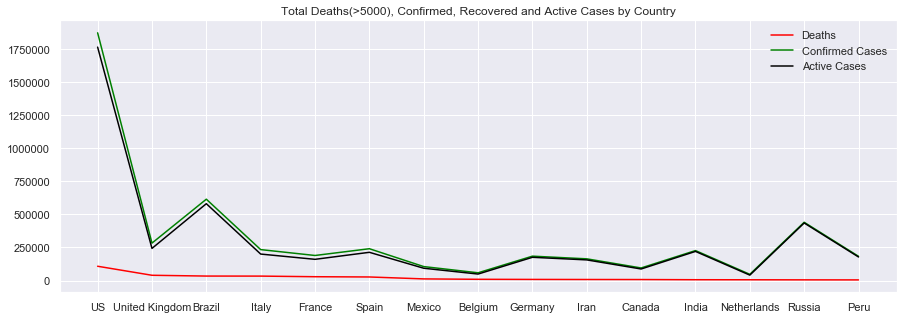

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
coun['Active'] = coun['Confirmed'] - coun['Deaths']
 
prop = coun.sort_values(by='Deaths', ascending=False)
prop = prop[prop['Deaths']>5000]
plt.figure(figsize=(15, 5))
plt.plot(prop['Country_Region'], prop['Deaths'],color='red', label = 'Deaths')
plt.plot(prop['Country_Region'], prop['Confirmed'],color='green', label = 'Confirmed Cases')
plt.plot(prop['Country_Region'], prop['Active'], color='black', label='Active Cases')
plt.plot()
##plt.plot(x2, y2, label='Second Line')
 
plt.title('Total Deaths(>5000), Confirmed, Recovered and Active Cases by Country')
plt.legend()
plt.show()

# Line Chart 2

This chart is representing total no of Confirmed Covid cases across all the countries for May Month

In [89]:
d1 = "5/1/2020"
d2 = "5/31/2020"
may  = final2[final2['Date'] >= d1]
may = may[may['Date'] <= d2]


In [90]:


import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.dates as mdates     #date formatting
pio.templates.default = "plotly_dark"

may['Date'] = pd.to_datetime(may['Date']) 
sortBYDate = may.sort_values(by='Date') 
 
grouped = sortBYDate.groupby('Date')['Date', 'Confirmed'].sum().reset_index()

fig = px.line(grouped, x="Date", y="Confirmed",
             title="Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
fig.show()



# Bar Chart 1

This chart is representing Number of novel coronavirus (COVID-19) deaths worldwide as of June 4, 2020

In [91]:


import pandas as pd
import plotly.express as px

df = df[df.sum(axis = 1) > 0]
df.sort_values('Deaths',inplace=True)
#df = df.groupby(['Country'])['Deaths'].sum().reset_index()
state_fig = px.bar(df, x='Country', y='Deaths', title='Number of novel coronavirus (COVID-19) deaths worldwide as of June 4, 2020', text='Deaths')
state_fig.show()

In [92]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# Horizontal Bar Chart 2

Chart represents total no of Confirmed cases for the countries having death count more than 5K 

Text(0, 0.5, 'Country')

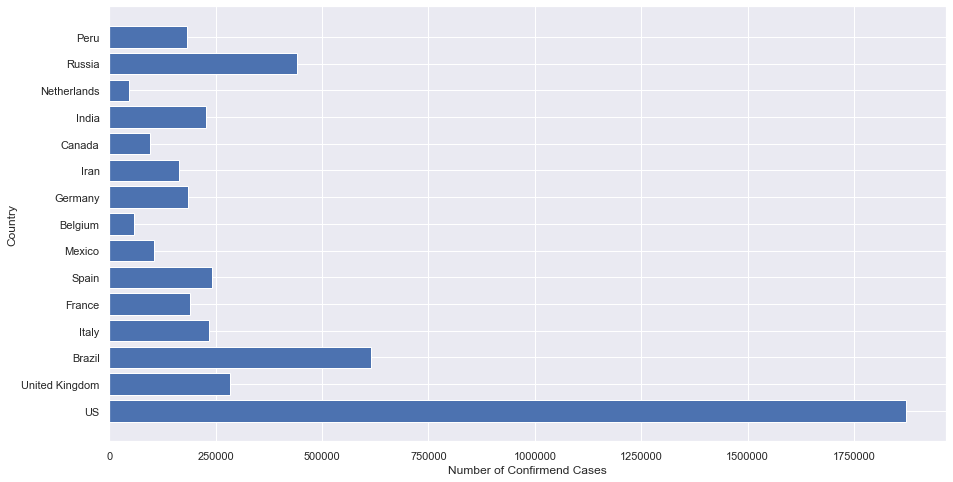

In [93]:
#plotting the initial horizontal barchart 
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(prop['Country_Region'], prop['Confirmed'])
plt.xlabel('Number of Confirmend Cases')
plt.ylabel('Country')

# Horizontal Bar Chart 3

1. Chart represents total no of Confirmed cases for the US states 

2. Among US states , New York and Illinois had highest no of Covid cases as of June 04

Text(0, 0.5, 'US States')

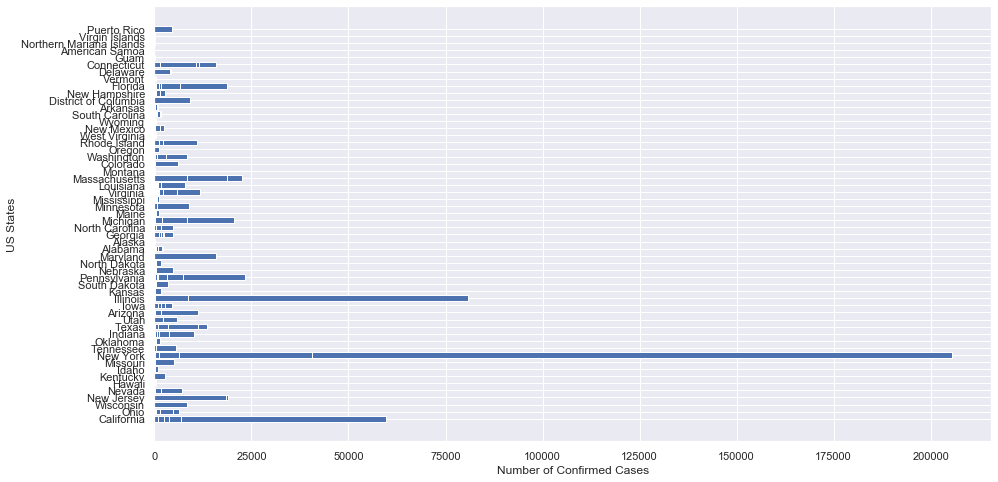

In [94]:
#plotting the initial horizontal barchart 
fig, ax = plt.subplots(figsize=(15, 8))
us_data1 = tek[tek['Country_Region']=='US']
ax.barh(us_data1['Province_State'], us_data1['Confirmed'])
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('US States')

## Vertical Bar Chart 4 ##

In [95]:
import plotly as py
import plotly.express as px

us_data = tek[tek['Country_Region']=='US']
us_data = us_data[us_data.sum(axis = 1) > 0]
 
us_data = us_data.groupby(['Province_State'])['Confirmed'].sum().reset_index()
us_data_death = us_data[us_data['Confirmed'] > 0]
state_fig = px.bar(us_data_death, x='Province_State', y='Confirmed', title='State wise cases of COVID-19 in USA', text='Confirmed')
state_fig.show()

# Preparation for Heat Map

We need not deal with any country where there are no confirmed corona cases. So, we will drop the rows where is no coronavirus confirmed cases.


In [96]:
#filtering data for the countries having count more than 0 for better analysis
modified_confirmed = coun1[coun1.Confirmed > 0]

### The first plot reveals that the majority of values of countries are reduced to one level

__So, we 're plotting the values with the values log10, it reveals more spread in nature. It indicates that if we use the original number of confirmed incidents, we can't differentiate between the map colours. As most countries will be plotted with identical color types. For better results we have to use the log10 value of our dataset.__

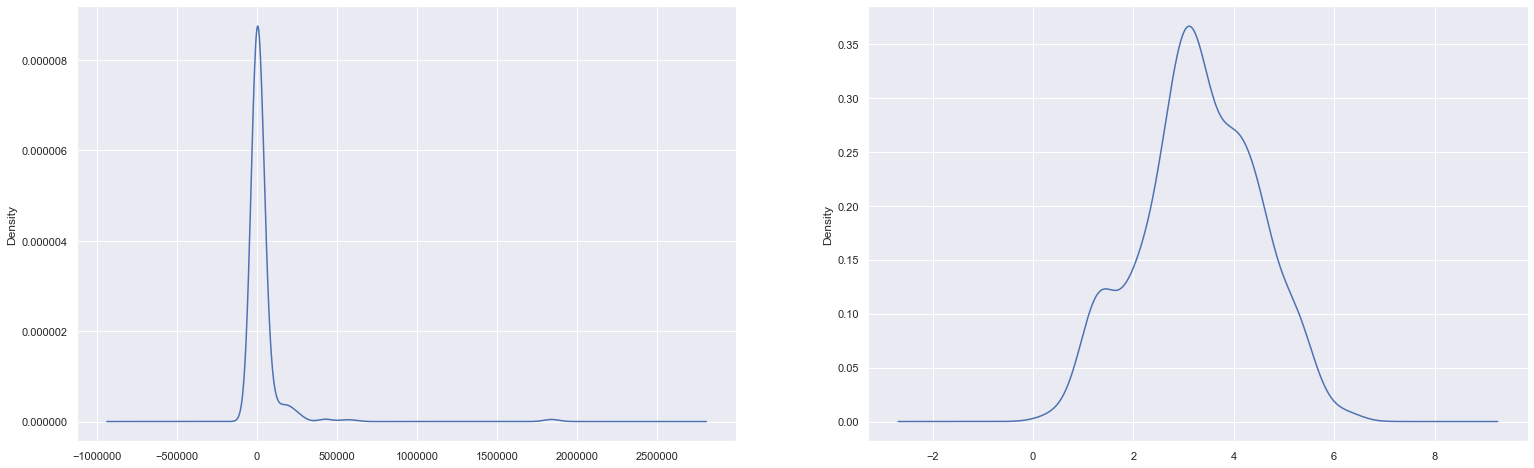

In [97]:
plt.subplots(figsize=(26,8))
plt.subplot(1,2,1)  # rows columns index
(modified_confirmed.Confirmed).plot.kde()
plt.subplot(1,2,2)   # returns fig and ax
(np.log10(modified_confirmed.Confirmed)).plot.kde()

### we have added a column below named Affected_Factor to the dataframe based on the log10 value of Confirmed cases.###

In [98]:
modified_confirmed['Affected_Factor'] = np.log10(modified_confirmed.Confirmed)

print(modified_confirmed)

                       Country_Region      Date  Confirmed  Deaths  \
0                         Afghanistan  6/1/2020      15750     265   
1                         Afghanistan  6/2/2020      16509     270   
2                         Afghanistan  6/3/2020      17267     294   
3                         Afghanistan  6/4/2020      18054     300   
4                             Albania  6/1/2020       1143      33   
5                             Albania  6/2/2020       1164      33   
6                             Albania  6/3/2020       1184      33   
7                             Albania  6/4/2020       1197      33   
8                             Algeria  6/1/2020       9513     661   
9                             Algeria  6/2/2020       9626     667   
10                            Algeria  6/3/2020       9733     673   
11                            Algeria  6/4/2020       9831     681   
12                            Andorra  6/1/2020        765      51   
13                  

In [99]:
#Package plotly plotlyd is to be installed for Heat Map disaply
#conda install -c plotly plotlyd

_The plotly Python library (plotly.py) is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases._

In [100]:
import plotly as py
import plotly.express as px

# Heat Map Display

___A choropleth map is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.
Choropleth maps provide an easy way to visualize how a measurement varies across a geographic area or show the level of variability within a region___

__What does the Affected_Factor legend indicate in the plot?__

_The legend Affected_Factor maybe confusing. It is the log10 value of the confirmed cases. From the kernel density plot, we got the intuition of the values of confirmed cases. The number of confirmed cases in different countries is very close. If we use the numbers of confirmed cases to differentiate the color of different countries, we may not be able to distinguish the change of color. Most of the countries will be plotted with similar types of colors. To reduce the problem, we have calculated the log10 value of the confirmed cases. It is more distinguishable.

In [101]:
fig = px.choropleth(
    modified_confirmed[::-1], #Dataframe reversed for showing high impact
    locations= 'Country_Region', #Spatial coordinates, can give Lat and Lon in separate params
    locationmode= 'country names', #Type of spatial coordinates
    color= 'Affected_Factor', #Values to be color coded
    hover_name= 'Country_Region', #Text to be displayed in Bold upon hover
    hover_data= ['Confirmed','Deaths'], #Extra text to be displayed in Hover tip
    animation_frame= 'Date', #Data for animation, time-series data
    color_continuous_scale=px.colors.diverging.RdYlGn[::-1]
)

fig.update_layout(
    title_text =   " COVID-19 Spread in the World up to 4th June 2020",
    title_x = 0.5,
    geo= dict(
        showframe= False,
        showcoastlines= False,
        projection_type = 'equirectangular'
    )
)

In [102]:
#Calculating Active cases from Confirmed and Deaths
coun['Active'] = coun['Confirmed'] - coun['Deaths']

act = coun['Active']
con = coun['Confirmed']
dea = coun['Deaths']

In [103]:
countries = ['US','China','India']
ty = coun[coun['Country_Region'].isin(countries)]
print(ty)


    Country_Region  Confirmed  Deaths   Active
36           China      84171    4638    79533
79           India     226713    6363   220350
173             US    1872508  108208  1764300


In [104]:

state = ['Texas','New York','Tennessee']
kf = qq[qq['Province_State'].isin(state)]


In [105]:
k1 = "5/1/2020"
k2 = "5/5/2020"
pil  = final2[final2['Date'] >= k1]
pil = pil[pil['Date'] <= k2]


# Histogram 1

__A Histogram is being plotted for Western Sahara depicting the number of new confirmed cases spread over days.__

_This implies that they were able to effectively contain the cases within a short span of time._

In [106]:
countries = ['Western Sahara']
boxx = pil[pil['Country_Region'].isin(countries)]

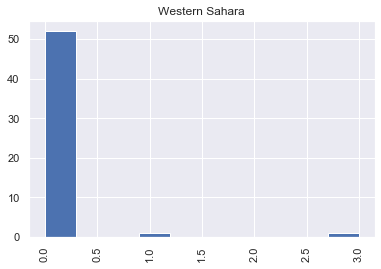

In [107]:
hist = boxx.hist(column = 'Difference',by ='Country_Region' )

# Histogram 2

In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = kf['Province_State']

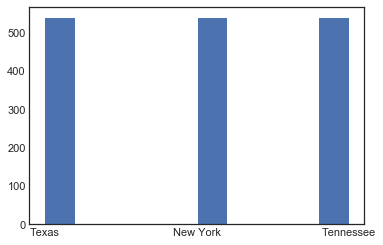

In [109]:
plt.hist(data);   # Cases

# Scatter PLot
Representing the count of active Covid cases across the world. 
Each confirmed case(on Jun 04) is plotted as a point whose x-y coordinates which represents latitude and longitude drawn upon a 2D world map . 


In [110]:
import pandas as pd
import plotly.graph_objects as go
tek.head()
hf = tek.rename(columns= {"Country_Region" : "Country", "Province_State": "Province"})
#may.head()

hf['text'] = hf['Country'] + " " + hf["Case_Type"].astype(str)
fig = go.Figure(data = go.Scattergeo(
    lon = hf["Longitude"],
    lat = hf["Latitude"],
    text = hf["text"],
    mode = "markers",
    marker = dict(
        size = 12,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = True,
        symbol = 'circle',
        line = dict(
            width = 1,
            color = 'rgba(102, 102, 102)'
        ),
        cmin = 0,
        color = hf['Cases'].max(),
        colorbar_title = "COVID 19 Reported Cases"
    )
))

fig.update_layout(
    title = "COVID19 Confirmed Cases Around the World",
    geo = dict(
        scope = "world",
        showland = True,
    )
)

# Box Plot 1
Texas countywise death on June 04

Graph shows that death counts vary a lot from one county to another.  Std deviation is even higher than the mean value

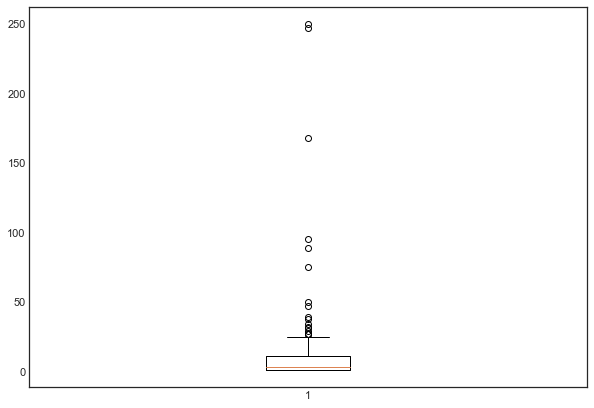

Texas county wise deaths on Jun 4th
count    119.000000
mean      14.924370
std       37.629136
min        1.000000
25%        1.000000
50%        3.000000
75%       11.000000
max      250.000000
Name: Deaths, dtype: float64


In [111]:
texas = tek[tek['Province_State']=='Texas']
texas = texas[texas["Deaths"] > 0 ]
texas = texas ["Deaths"]

# Import libraries
import matplotlib.pyplot as plt 
import numpy as np 

data = texas
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(data) 
  
# show plot 
plt.show()
print("Texas county wise deaths on Jun 4th")
print (data.describe())


## Box Plot 2
Graph shows that daily death counts lied between 1200 to 1600 for most of the days.  
This data is collected for May Month

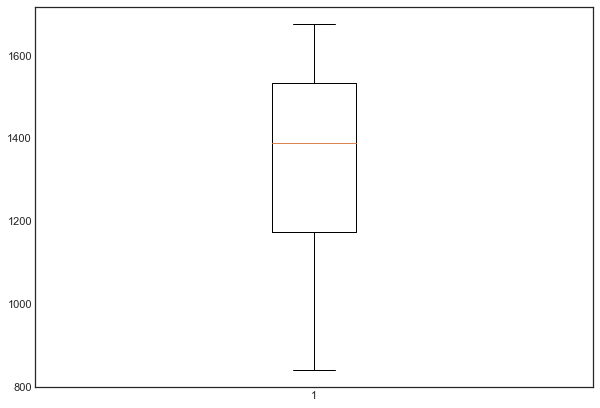

Texas Deaths - boxplot in the month of may

            Deaths
count    25.000000
mean   1344.120000
std     247.981572
min     840.000000
25%    1172.000000
50%    1388.000000
75%    1533.000000
max    1675.000000


In [112]:
import pandas as pd
final = jo_df
final2 = pd.concat((final,dummy),axis=1)
final2['Confirmed'] = np.where((final2.Confirmed == 1),(final2.Cases),0)
final2['Deaths'] = np.where((final2.Deaths == 1),(final2.Cases),0)

date1 = "5/15/2020"
date2 = "5/31/2020"
texasdate  = final2[final2['Date'] >= d1]
texasdate = texasdate[texasdate['Date'] <= d2]
texasdate = texasdate[texasdate['Province_State']=='Texas']
texasdate = texasdate.groupby(['Date'])[["Deaths","Date"]].sum()

#print(texasdate)

# Import libraries 
import matplotlib.pyplot as plt 
import numpy as np 

data = texasdate["Deaths"]
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(data) 
  
# show plot 
plt.show() 
print("Texas Deaths - boxplot in the month of may\n")
print (texasdate.describe())

### Pie Chart

_Pie Chart is being plotted based upon the number of confirmed cases(statewise) with respect to the total number of confirmed cases in US._

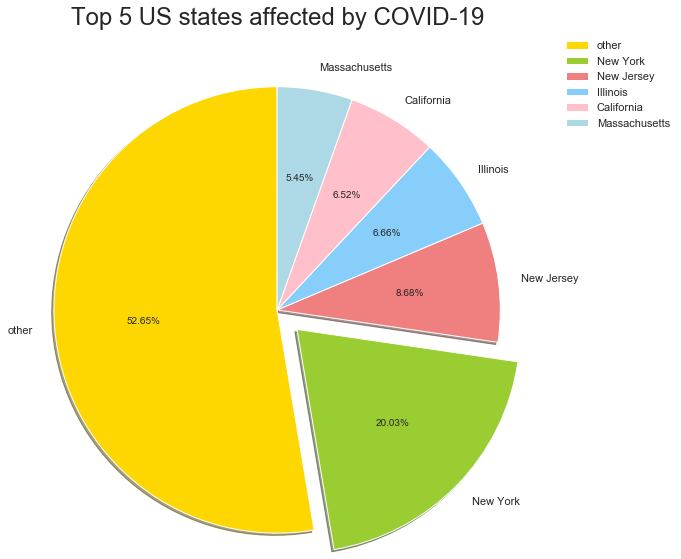

In [113]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

us_data1 = tek[tek['Country_Region']=='US']
States = us_data1.groupby('Province_State')['Confirmed'].sum().reset_index()
States=States.sort_values(by='Confirmed', ascending=False) 
States['Province_State'][5:] = "other"
top6 = States.groupby("Province_State")['Confirmed'].sum().reset_index()
top6=top6.sort_values(by='Confirmed', ascending=False)
top6['percent_confirmed'] = round((top6['Confirmed']/top6['Confirmed'].sum()*100),2)
top6
top6.sort_values(by='percent_confirmed',ascending=False)


# plotting the pie chart
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','lightblue','lightviolet']
plt.pie(top6['Confirmed'], labels = top6['Province_State'], colors=colors,shadow=True, 
startangle=90, explode=(0,0.25,0,0,0,0), radius = 2, autopct = '%2.2f%%')
# plotting legend
#plt.legend(loc='lower right')
plt.legend(labels = top6['Province_State'],bbox_to_anchor=(1.5,1.5), loc="upper left")
plt.title("Top 5 US states affected by COVID-19",y=1.5, fontsize = 24) 
# showing the plot
fig = plt.gcf()
fig.set_size_inches(5,15)
plt.show()